In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.losses import MeanSquaredError

2022-03-06 02:19:26.806189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-06 02:19:26.806267: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, _), (x_test, _) = datasets.fashion_mnist.load_data()
(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 9

autoencoder = Sequential([
    Flatten(name='encoder_flatten', input_shape=(28, 28)),
    Dense(300, activation='relu', name='encoder_1'),
    Dense(100, activation='relu', name='encoder_2'),
    Dense(latent_dim, activation='relu', name='encoder_output'),
    Dense(100, activation='relu', name='decoder_1'),
    Dense(300, activation='relu', name='decoder_2'),
    Dense(28*28, activation='relu', name='decoder_output'),
    Reshape((28, 28), name='decoder_reshape') 
])

autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_flatten (Flatten)   (None, 784)               0         
                                                                 
 encoder_1 (Dense)           (None, 300)               235500    
                                                                 
 encoder_2 (Dense)           (None, 100)               30100     
                                                                 
 encoder_output (Dense)      (None, 9)                 909       
                                                                 
 decoder_1 (Dense)           (None, 100)               1000      
                                                                 
 decoder_2 (Dense)           (None, 300)               30300     
                                                                 
 decoder_output (Dense)      (None, 784)               2

2022-03-06 02:19:30.060641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-06 02:19:30.060704: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-06 02:19:30.060731: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-QO6EU4N): /proc/driver/nvidia/version does not exist
2022-03-06 02:19:30.060989: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/15


2022-03-06 02:19:30.289553: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-03-06 02:19:30.617845: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.0315 - val_loss: 0.0250
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0238 - val_loss: 0.0229
Epoch 3/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0222 - val_loss: 0.0213
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0212 - val_loss: 0.0209
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0207 - val_loss: 0.0206
Epoch 6/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0203 - val_loss: 0.0202
Epoch 7/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0199 - val_loss: 0.0195
Epoch 8/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0194 - val_loss: 0.0195
Epoch 9/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0191 - val_loss: 0.0191
Epoch 10/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0

In [5]:
autoencoder.layers

In [6]:
encoder = Sequential()
for layer in autoencoder.layers[:4]:
    encoder.add(layer)
    
decoder = Sequential()
decoder.add(Input(shape=(latent_dim,)))
for layer in autoencoder.layers[4:]:
    decoder.add(layer)

In [7]:
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_flatten (Flatten)   (None, 784)               0         
                                                                 
 encoder_1 (Dense)           (None, 300)               235500    
                                                                 
 encoder_2 (Dense)           (None, 100)               30100     
                                                                 
 encoder_output (Dense)      (None, 9)                 909       
                                                                 
Total params: 266,509
Trainable params: 266,509
Non-trainable params: 0
_________________________________________________________________


In [8]:
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_1 (Dense)           (None, 100)               1000      
                                                                 
 decoder_2 (Dense)           (None, 300)               30300     
                                                                 
 decoder_output (Dense)      (None, 784)               235984    
                                                                 
 decoder_reshape (Reshape)   (None, 28, 28)            0         
                                                                 
Total params: 267,284
Trainable params: 267,284
Non-trainable params: 0
_________________________________________________________________


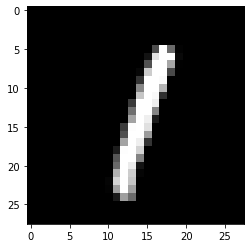

In [9]:
image_idx = 5
plt.imshow(x_test[image_idx], cmap='gray') ## This observation was used during ... it's not a perfect experimental design

[3.9144406  4.7051606  0.61286247 1.7784084  1.1460046  4.000576
 0.         1.0487107  1.6416252 ]


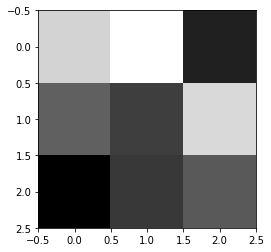

In [10]:
pred_enc = encoder.predict(np.expand_dims(x_test[image_idx], axis=0))
print(pred_enc[0])
plt.imshow(pred_enc[0].reshape((3,3)), cmap='gray');

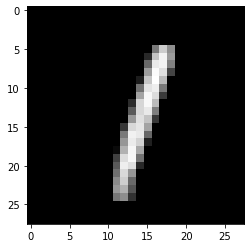

In [11]:
plt.imshow(decoder.predict(pred_enc)[0], cmap='gray')